In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import re

%matplotlib inline

In [22]:
data = pd.read_csv('jobs.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          47 non-null     object
 1   technologies  47 non-null     object
dtypes: object(2)
memory usage: 880.0+ bytes


,name,technologies
count,47,47
unique,11,46
top,Python-програміст,"Python,Програмування,Креативність"
freq,24,2


In [23]:
data.head(5)

,name,technologies
0,Python-програміст,"Python,Docker,REST API,Redis,Machine learning,..."
1,"IT, комп'ютери, інтернет","Організованість,Відповідальність,Python,JavaSc..."
2,Python-програміст,"HTML,GitHub,JavaScript,Python,JSON,Знання прин..."
3,Python-програміст,"Java,PHP,MySQL,Git,GitHub,GitLab,JavaScript,Py..."
4,Python-програміст,"Користувач ОС Linux,SQL,Git,Python,Docker,Робо..."


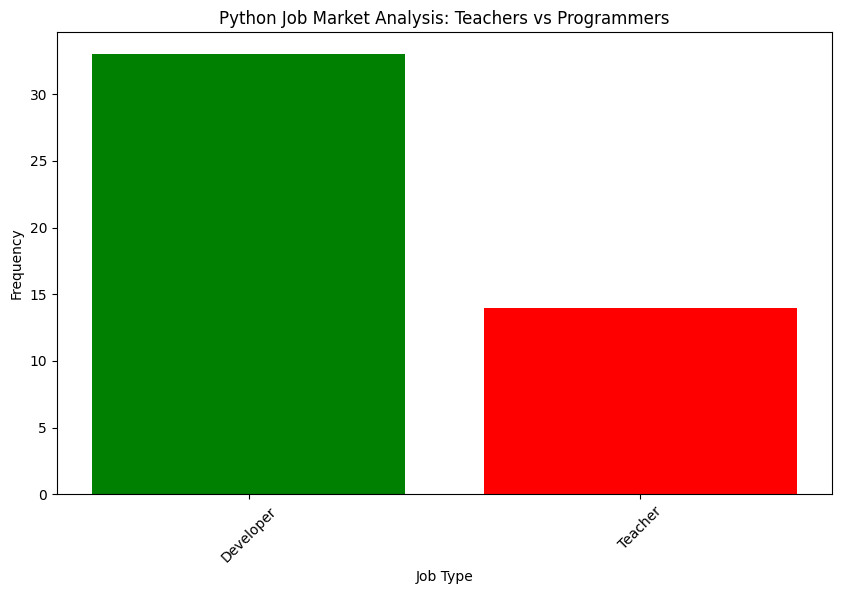

In [29]:
data["category"] = data["name"].apply(lambda x: "Teacher" if "Викладач" in x else "Developer")

job_count = Counter(data["category"])

plt.figure(figsize=(10, 6))
plt.bar(job_count.keys(), job_count.values(), color=["green", "red"])
plt.title("Python Job Market Analysis: Teachers vs Programmers")
plt.xlabel("Job Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

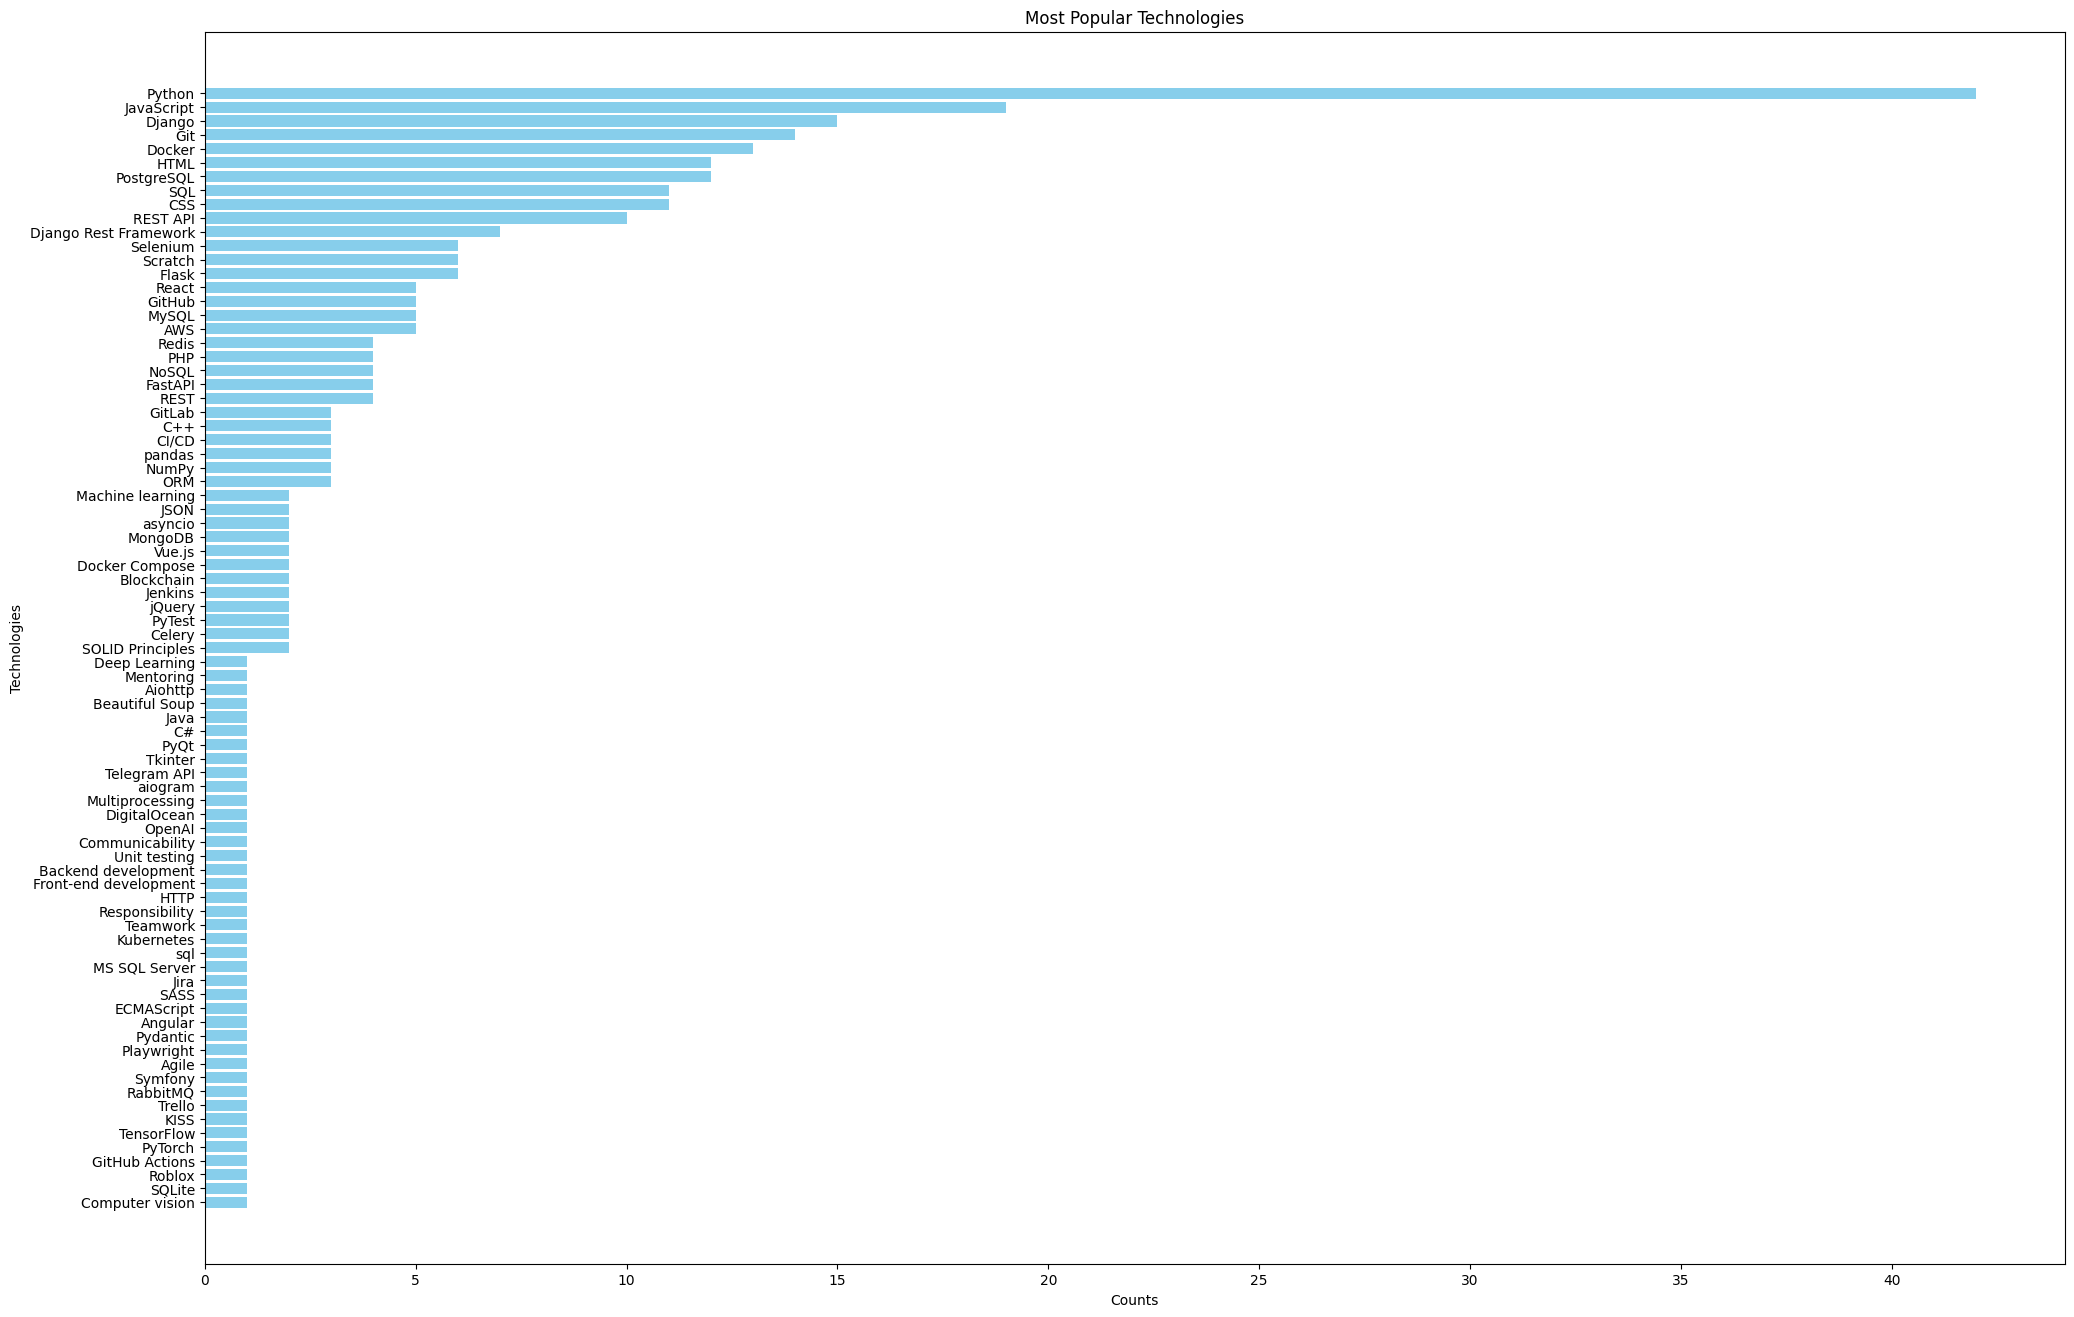

In [26]:
all_technologies = []
for tech_list in data["technologies"]:
    technologies = tech_list.split(",")
    filtered_technologies = [tech for tech in technologies if not re.search(r"[а-яА-Я]", tech)]
    all_technologies.extend(filtered_technologies)
tech_count = Counter(all_technologies)

most_common_tech = tech_count.most_common()

plt.figure(figsize=(24, 16))
technologies, counts = zip(*most_common_tech)
plt.barh(technologies, counts, color="skyblue")
plt.xlabel("Counts")
plt.ylabel("Technologies")
plt.title("Most Popular Technologies")
plt.gca().invert_yaxis()  # To display the most common at the top
plt.show()